In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from pandas.api.types import is_numeric_dtype

import warnings
warnings.filterwarnings("ignore")

import random
%matplotlib inline

seed = 42
random.seed(seed)
np.random.seed(seed)
df_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
nulls = df_train.isnull().sum().sort_values(ascending=False)
nulls = nulls[nulls > 0]
nulls = nulls.to_frame().rename(columns={0: "Nulls"})
nulls["%"] = np.round((nulls["Nulls"] / len(df_train)) * 100, 2).astype(str) + "%"
nulls

,Nulls,%
PoolQC,1453,99.52%
MiscFeature,1406,96.3%
Alley,1369,93.77%
Fence,1179,80.75%
FireplaceQu,690,47.26%
LotFrontage,259,17.74%
GarageYrBlt,81,5.55%
GarageCond,81,5.55%
GarageType,81,5.55%
GarageFinish,81,5.55%


In [4]:
def fix_missing_values(df):
    df.loc[df["PoolQC"].isna(), "PoolQC"] = "None"
    df.loc[df["MiscFeature"].isna(), "MiscFeature"] = "None"
    df.loc[df["GarageType"].isna(), "GarageType"] = "None"
    df.loc[df["Alley"].isna(), "Alley"] = "None"
    df.loc[df["Fence"].isna(), "Fence"] = "None"
    df.loc[df["FireplaceQu"].isna(), "FireplaceQu"] = "None"
    df.loc[df["LotFrontage"].isna(), "LotFrontage"] = 0
    df.loc[df["GarageType"].isna(), "GarageType"] = "None"
    df.loc[df["GarageFinish"].isna(), "GarageFinish"] = "None"
    df.loc[df["GarageQual"].isna(), "GarageQual"] = "None"
    df.loc[df["GarageCond"].isna(), "GarageCond"] = "None"
    df.loc[df["GarageYrBlt"].isna(), "GarageYrBlt"] = 0
    df.loc[df["BsmtFinType2"].isna(), "BsmtFinType2"] = "None"
    df.loc[df["BsmtExposure"].isna(), "BsmtExposure"] = "None"
    df.loc[df["BsmtQual"].isna(), "BsmtQual"] = "None"
    df.loc[df["BsmtCond"].isna(), "BsmtCond"] = "None"
    df.loc[df["BsmtFinType1"].isna(), "BsmtFinType1"] = "None"
    df.loc[df["MasVnrArea"].isna(), "MasVnrArea"] = 0
    df.loc[df["MasVnrType"].isna(), "MasVnrType"] = "None"
    df.drop(df[df["Electrical"].isna()].index, axis=0, inplace=True)
    
    return df
    
fix_missing_values(df_train)
df_train.isnull().sum().sum()

0

In [5]:
numeric = [col for col in df_train.columns if is_numeric_dtype(df_train[col])]
non_numeric = list(set(df_train.columns.values) - set(numeric))

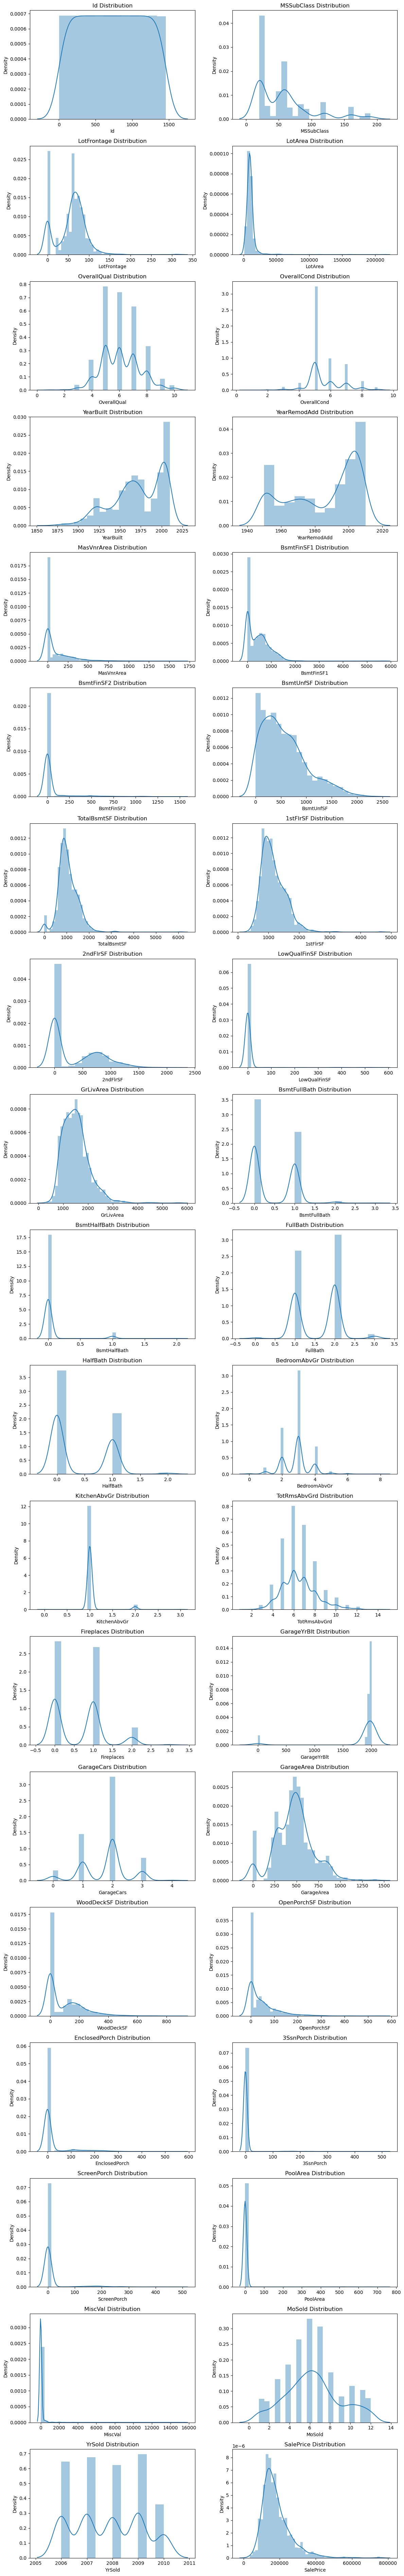

In [6]:
n_cols = 2
n_rows = math.ceil(len(numeric) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

for i, numeric_feat in enumerate(numeric):
    ax = axes[i // n_cols][i % n_cols]
    ax.set_title(f"{numeric_feat} Distribution")
    sns.distplot(df_train[numeric_feat], ax=ax)
    
i += 1
while i < (n_rows * n_cols):
    axes[i // n_cols][i % n_cols].remove()
    i += 1
    
plt.tight_layout()
plt.show()

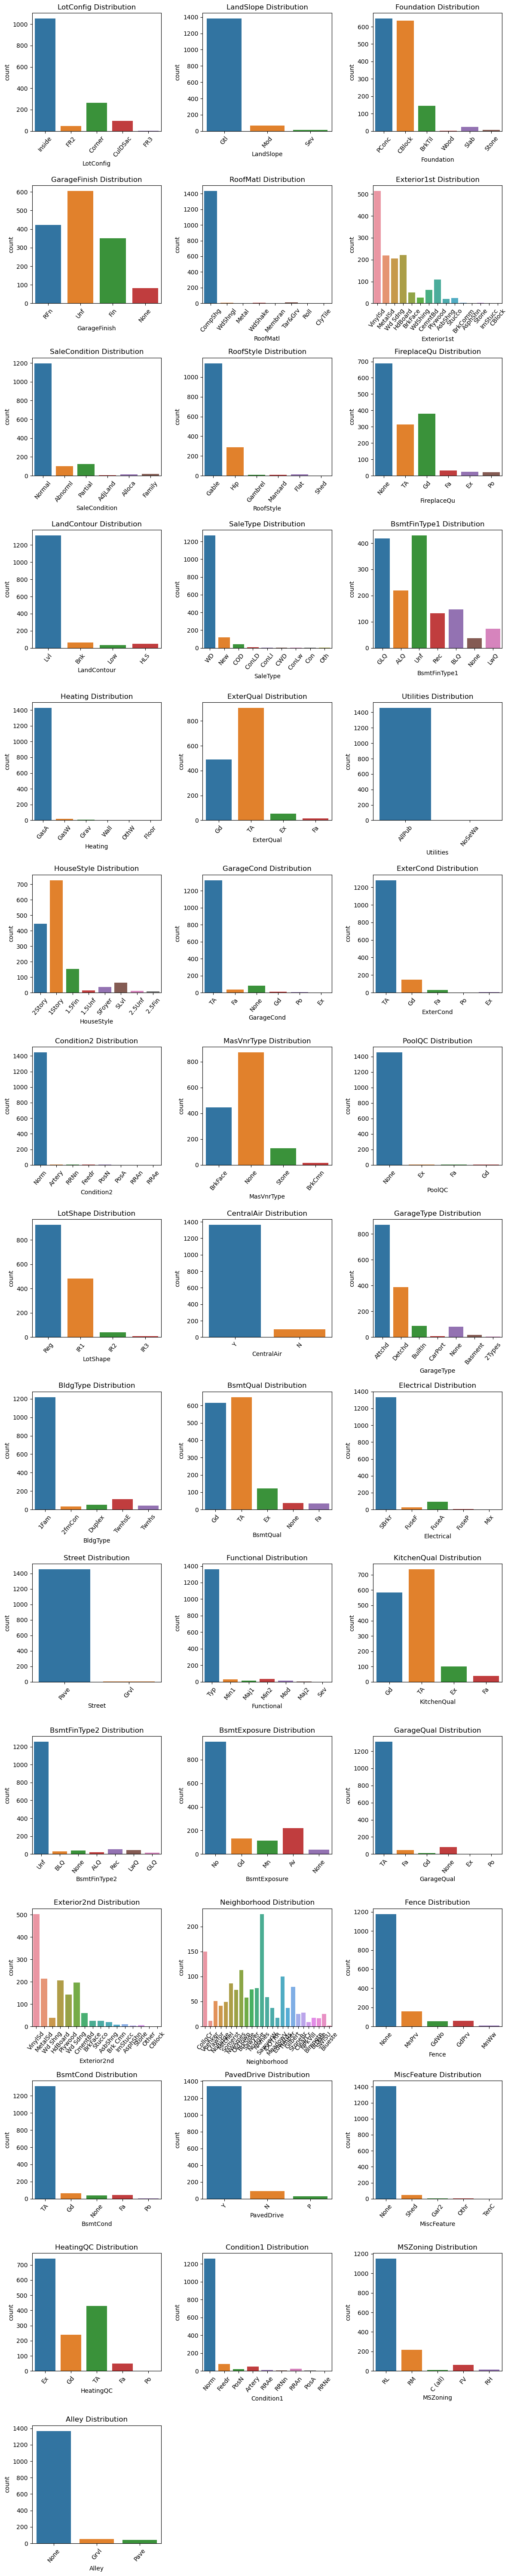

In [7]:
n_cols = 3
n_rows = math.ceil(len(non_numeric) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

for i, categorical_feat in enumerate(non_numeric):
    ax = axes[i // n_cols][i % n_cols]
    ax.set_title(f"{categorical_feat} Distribution")
    plot = sns.countplot(x=df_train[categorical_feat], ax=ax)
    ax.set_xticklabels(plot.get_xticklabels(), rotation=50)
    
i += 1
while i < (n_rows * n_cols):
    axes[i // n_cols][i % n_cols].remove()
    i += 1
    
plt.tight_layout()
plt.show()